In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
from glob import glob
from scipy import stats
import itertools as it

from matplotlib.patches import ConnectionPatch as connpatch

In [2]:
def singifmtx(mwhit, limits=[1e-4,1e-3,1e-2]):
    smwhit = np.zeros_like(mwhit, dtype='<U5')
    for i in range(mwhit.shape[0]):
        for j in range(mwhit.shape[1]):
            
            if mwhit[i,j] <= limits[0]:
                smwhit[i,j] = '***'
            elif (mwhit[i,j] > limits[0]) and (mwhit[i,j] <= limits[1]):
                smwhit[i,j] = '**'
            elif (mwhit[i,j] > limits[1]) and (mwhit[i,j] <= limits[2]):
                smwhit[i,j] = '*'
            else:
                smwhit[i,j] = 'n.s.'
    return smwhit

limits = limits=[5e-4,5e-3,5e-2]

In [4]:
colors = ['#117733', '#aa4499', '#332288', '#44aa99', '#88ccee', '#ddcc77']
fs = 15

src = '../proc/prelim/'
dst = '../proc/plots/'
csvfiles = glob(src + '*/*.csv')
Times = ['9am','12pm','4pm']
csvfiles[:5]

['../proc/prelim/9am_rep4/9am_rep4_plant_02.csv',
 '../proc/prelim/9am_rep4/9am_rep4_plant_03.csv',
 '../proc/prelim/9am_rep4/9am_rep4_plant_01.csv',
 '../proc/prelim/9am_rep4/9am_rep4_plant_00.csv',
 '../proc/prelim/9am_rep4/9am_rep4_plant_04.csv']

In [5]:
manudf = pd.read_csv('../raw/20231003-Max-raw-data.csv')
manu = {'9am': manudf.iloc[:7, np.array([9,15])].values, 
        '12pm': manudf.iloc[7:14, np.array([9,15])].values,
        '4pm': manudf.iloc[14:, np.array([9,15])].values}

manuct = np.zeros(len(Times), dtype=float)
manuct[0] = np.sum(manudf.iloc[:7, 3].values)
manuct[1] = np.sum(manudf.iloc[7:14, 3].values)
manuct[2] = np.sum(manudf.iloc[14:, 3].values)
manuct = manuct/35

In [6]:
autoct = np.zeros_like(manuct)
dfs = dict(zip(Times, [ [] for i in range(len(Times)) ] ))
meta = dict(zip(Times, [ [] for i in range(len(Times)) ] ))

for i in range(len(csvfiles)):
    time, rep, _, pidx = os.path.splitext(os.path.split(csvfiles[i])[1])[0].split('_')
    df = pd.read_csv(csvfiles[i])
    df['timestamp'] *= 96/3600
    df = df.iloc[np.argmax((df.pos_raw_1 != -100).values):, :]
    if (df.shape[1]-1)//6 > 1:
        dfs[time].append(df)
        meta[time].append(np.asarray([rep[-1], pidx, *df.shape]).astype(int))
i = 0
for key in meta:
    meta[key] = np.asarray(meta[key])
    print(key, '\t', meta[key].shape)
    autoct[i] = meta[key].shape[0] / (5*np.max(meta[key][:,0]))
    i += 1

9am 	 (34, 4)
12pm 	 (21, 4)
4pm 	 (28, 4)


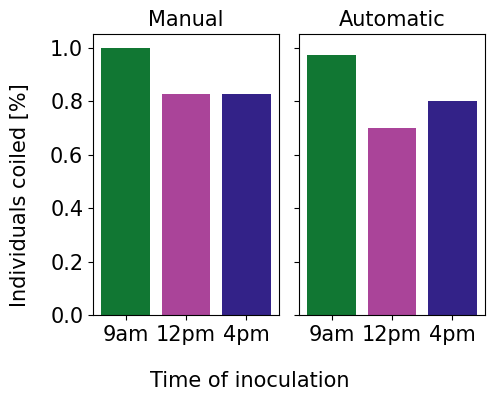

In [7]:
fig, ax = plt.subplots(1,2, figsize=(5,4), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel()    

ax[0].set_title('Manual', fontsize=fs)
ax[1].set_title('Automatic', fontsize=fs)

for i,foo in enumerate([manuct, autoct]):
    ax[i].bar(range(len(Times)), foo, color=colors[:len(Times)])

for i in range(len(ax)):
    #ax[i].margins(x = 0.05)
    ax[i].set_xticks(range(len(Times)), Times)
    ax[i].tick_params(labelsize=fs)

fig.supxlabel('Time of inoculation', fontsize=fs)
fig.supylabel('Individuals coiled [%]', fontsize=fs)
fig.tight_layout();

filename = dst + 'coil_percentage'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

# Plot all individual cuscutas at once

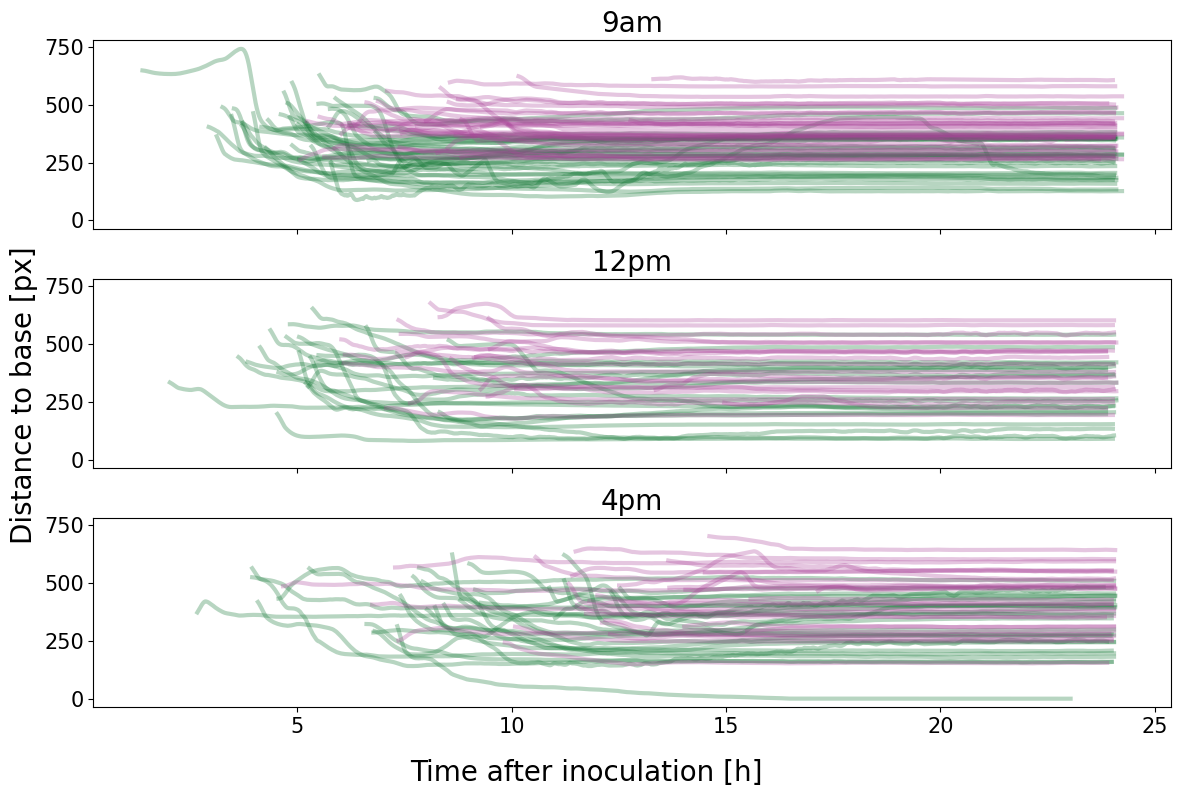

In [8]:
fig, ax = plt.subplots(3,1, figsize=(12,8), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel(); i = 0

for k in range(len(Times)):
    key = Times[k]
    ax[k].set_title(Times[k], fontsize=fs)
    for i in range(len(dfs[key])):
        df = dfs[key][i]
        
        for j in range(2):
            anglab = 'angle_sg_{}'.format(j+1)
            rposlab = 'pos_raw_{}'.format(j+1)
            poslab = 'pos_sg_{}'.format(j+1)
            mask = df[rposlab] > 0
            ax[k].plot(df['timestamp'].loc[mask], df[poslab].loc[mask], lw=3, color=colors[j], alpha=0.3, zorder=j+1)

for i in range(len(ax)):
    ax[i].tick_params(labelsize=fs-5)
            
fig.supxlabel('Time after inoculation [h]', fontsize=fs)
fig.supylabel('Distance to base [px]', fontsize=fs)
fig.tight_layout()

filename = dst + 'all_positions'
#plt.savefig(filename + '.svg', format='svg', dpi=200, bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

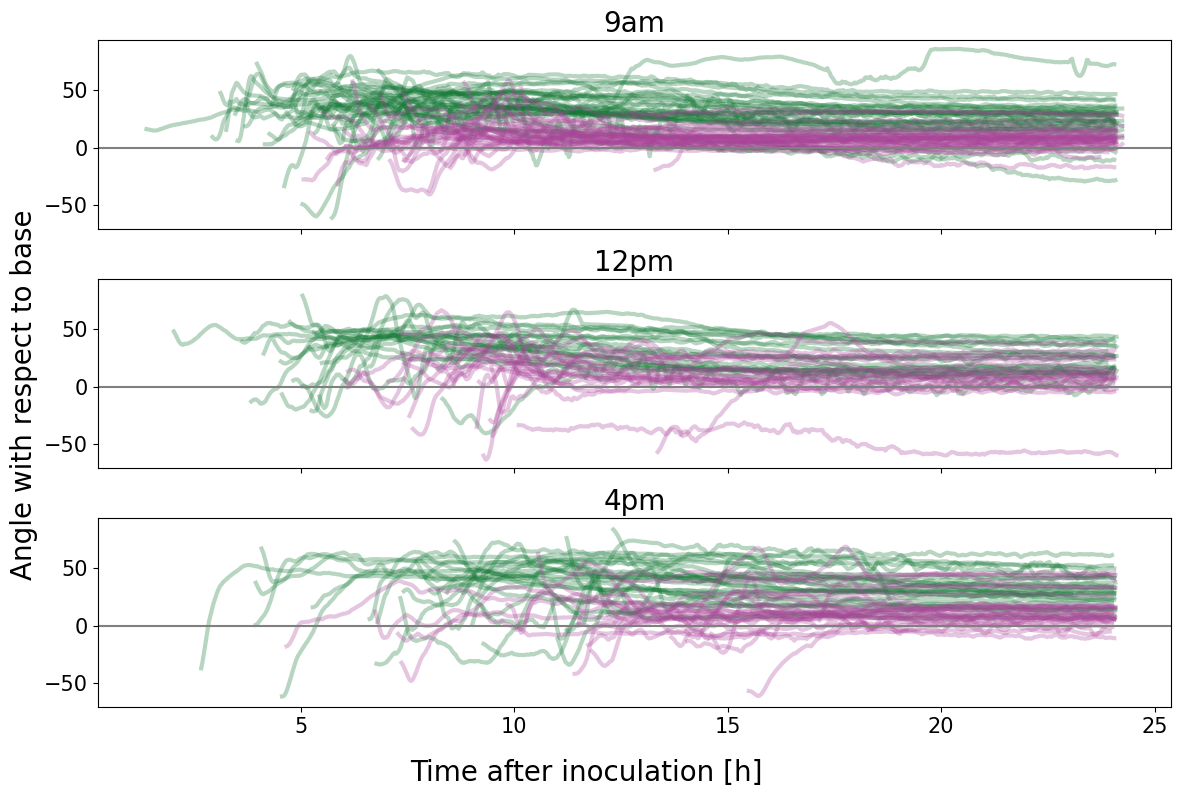

In [9]:
fig, ax = plt.subplots(3,1, figsize=(12,8), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel(); i = 0

for k in range(len(Times)):
    key = Times[k]
    ax[k].set_title(Times[k], fontsize=fs)
    for i in range(len(dfs[key])):
        df = dfs[key][i]
        
        for j in range(2):
            anglab = 'angle_sg_{}'.format(j+1)
            rposlab = 'pos_raw_{}'.format(j+1)
            poslab = 'pos_sg_{}'.format(j+1)
            mask = df[rposlab] > 0
            ax[k].plot(df['timestamp'].loc[mask], df[anglab].loc[mask], lw=3, color=colors[j], alpha=0.3, zorder=j+1)

for i in range(len(ax)):
    ax[i].tick_params(labelsize=fs-5)
    ax[i].axhline(0, c='gray')
            
fig.supxlabel('Time after inoculation [h]', fontsize=fs)
fig.supylabel('Angle with respect to base', fontsize=fs)
fig.tight_layout()

filename = dst + 'all_angles'
#plt.savefig(filename + '.svg', format='svg', dpi=200, bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

# Find at which timestamp the cuscuta gets infront of the skewer

## Then at which timestamp the cuscuta gets infront of the skewer for a 2nd time

### The latter can be seen as the time it takes cuscuta to coil itself around the skewer.

We then perform Mann-Whitney U-tests to see if the differences are statistically significant

In [106]:
times = dict()

for key in dfs:
    time = np.random.default_rng(42).normal(0, 0.1, size=(len(dfs[key]), 2))
    for i in range(len(dfs[key])):
        for j in range(2):
            anglab = 'angle_sg_{}'.format(j+1)
            poslab = 'pos_sg_{}'.format(j+1)
            rposlab = 'pos_raw_{}'.format(j+1)
    
            mask = dfs[key][i][rposlab] > 0
            time[i,j] += dfs[key][i]['timestamp'].iloc[np.argmax(mask)]

    times[key] = time

speed = dict()

for key in dfs:
    s = np.diff(times[key], axis=1).squeeze().astype(float)
    speed[key] = s

buff = 25
angles = dict()
positions = dict()

for key in dfs:
    angle = np.zeros((len(dfs[key]), 2))
    position = np.copy(angle)
    
    for i in range(len(angle)):
        df = dfs[key][i].iloc[-buff-10:-10]
        for j in range(2):
            anglab = 'angle_sg_{}'.format(j+1)
            poslab = 'pos_sg_{}'.format(j+1)
            
            angle[i,j] = np.median(df[anglab].values)
            position[i,j] = np.median(df[poslab].values)

    angles[key] = angle
    positions[key] = position

tight = dict()

for key in dfs:
    s = np.diff(positions[key], axis=1).squeeze().astype(float)
    tight[key] = s

tolpos, tolang = 15, 7.5

stables = dict()
quicks = dict()

for key in dfs:
    stable = np.zeros((len(dfs[key]), 2))
    quick = np.copy(stable)
    
    for i in range(len(stable)):
        for j in range(2):
            poslab = 'pos_sg_{}'.format(j+1)
            anglab = 'angle_sg_{}'.format(j+1)
            
            maskpos = np.abs(dfs[key][i][poslab] - positions[key][i,j]) < tolpos
            maskang = np.abs(dfs[key][i][anglab] - angles[key][i,j]) < tolang
            
            foo = np.nonzero(maskpos & maskang)[0]
            bar = np.nonzero(np.ediff1d(foo) != 1)[0]
            if len(bar) == 0:
                tt = foo[0]
            else:
                tt = foo[bar[-1]]

            stable[i,j] = dfs[key][i].loc[:, ['timestamp', poslab]].iloc[tt:, :].iloc[0,0]
            quick[i,j] = stable[i,j] - times[key][i,j]
            
    quicks[key] = quick
    stables[key] = stable

for d in [times, stables, quicks, angles, positions, tight, speed]:
    for key in d:
        
        reps = np.unique(meta[key][:,0], return_index=False)
        bar = [None for i in range(len(reps))]

        for i in range(len(reps)):
            foo = np.nonzero(meta[key][:,0] == reps[i])[0]
            bar[i] = np.mean(d[key][foo], axis=0)
        bar = np.asarray(bar)
        d[key] = bar

In [108]:
hmax = max([np.max(times[Times[i]]) for i in range(len(Times))] + [np.max(manu[Times[i]][:,0]) for i in range(len(Times))])
hmin = max([np.min(times[Times[i]]) for i in range(len(Times))] + [np.min(manu[Times[i]][:,0]) for i in range(len(Times))])

print(hmax, hmin)

mwhit = np.zeros((3,3))

for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    mwhit[ix, 0] = stats.mannwhitneyu(manu[Times[i]][:,0], manu[Times[j]][:, 0], method='exact').pvalue
    print('Manual\t',Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:',mwhit[ix,0])
    for k in range(2):
        mwhit[ix,k+1] = stats.mannwhitneyu(times[Times[i]][:,k], times[Times[j]][:, k], method='exact').pvalue
        print('Coil', k+1, '\t', Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:', mwhit[ix,k+1])
    print('---')

smwhit = singifmtx(mwhit, limits)
smwhit

14.94372062944029 5.66666666666667
Manual	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.20862470862470864
Coil 1 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.36596736596736595
Coil 2 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.2948717948717949
---
Manual	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.0005827505827505828
Coil 1 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.004079254079254079
Coil 2 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.004079254079254079
---
Manual	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.006993006993006993
Coil 1 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.013986013986013986
Coil 2 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.03496503496503496
---


array([['n.s.', 'n.s.', 'n.s.'],
       ['**', '**', '**'],
       ['*', '*', '*']], dtype='<U5')

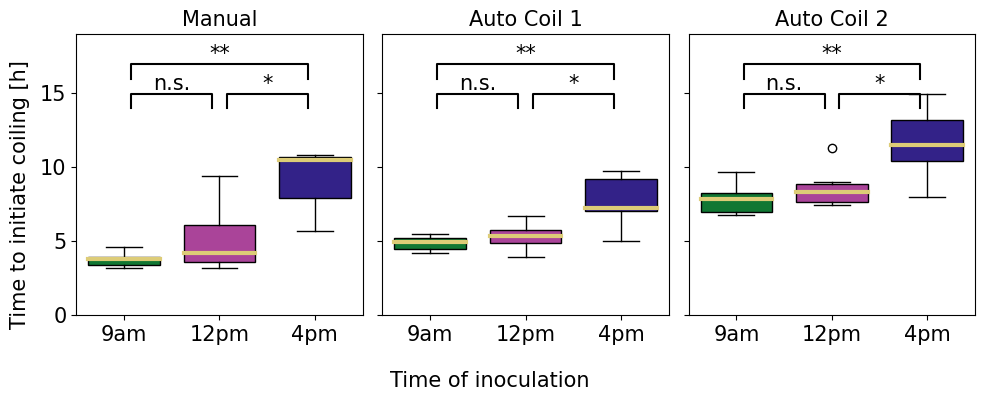

In [110]:
fs = 15

fig, ax = plt.subplots(1,3, figsize=(10,4), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel()    

ax[0].set_title('Manual', fontsize=fs)
foo = [manu[Times[i]][:,0] for i in range(len(Times))]
bplot = ax[0].boxplot(foo, widths=0.75, patch_artist=True, 
                  medianprops={'lw':3, 'color':colors[5]})
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)


ax[1].set_title('Auto Coil 1', fontsize=fs)
foo = [times[Times[i]][:,0] for i in range(len(Times))]
bplot = ax[1].boxplot(foo, widths=0.75, patch_artist=True, 
                  medianprops={'lw':3, 'color':colors[5]})
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)

ax[2].set_title('Auto Coil 2', fontsize=fs)
foo = [times[Times[i]][:,1] for i in range(len(Times))]
bplot = ax[2].boxplot(foo, widths=0.75, patch_artist=True, 
                  medianprops={'lw':3, 'color':colors[5]})
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)

epsx = 0.075
for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    if i+j == 2:
        epsy = 2
    else:
        epsy = 0
    xfoo = np.array([i+1+epsx, i+1+epsx, j+1-epsx, j+1-epsx])
    yfoo = np.array([hmax-1,hmax,hmax,hmax-1]) + epsy
    
    for k in range(len(ax)):    
        ax[k].text((xfoo[0] + xfoo[2])*.5, yfoo[0]+1, smwhit[ix,k], ha='center', va='bottom', color='k', fontsize=fs)
        ax[k].plot(xfoo, yfoo, lw=1.5, c='k')

for i in range(len(ax)):
    #ax[i].margins(x = 0.05)
    ax[i].set_xticks(range(1,4), Times)
    ax[i].tick_params(labelsize=fs)
    ax[i].set_ylim((0,hmax+4))

fig.supylabel('Time to initiate coiling [h]', fontsize=fs)
fig.supxlabel('Time of inoculation', fontsize=fs)
fig.tight_layout();

filename = dst + 'time_after_inoculation_repavg'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

In [112]:
mwhit = np.zeros((1,3))

for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    mwhit[0,ix] = stats.mannwhitneyu(speed[Times[i]], speed[Times[j]], method='exact').pvalue
    print('Coil', k+1, '\t', Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:', mwhit[0,ix])

smwhit = singifmtx(mwhit, limits)
print(smwhit)

hmin = min([np.min(speed[key]) for key in speed])
hmax = max([np.max(speed[key]) for key in speed])
print(hmin, hmax)

Coil 3 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.36596736596736595
Coil 3 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.05303030303030303
Coil 3 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.36596736596736595
[['n.s.' 'n.s.' 'n.s.']]
2.2384189241392525 5.336254625521763


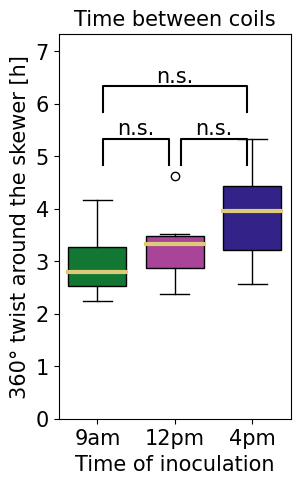

In [115]:
fig, ax = plt.subplots(1,1, figsize=(3,5), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel(); i=0

bplot = ax[i].boxplot([speed[key] for key in speed], 
                      widths=0.75, patch_artist=True, 
                      medianprops={'lw':3, 'color':colors[5], 'alpha':1}, zorder=3)
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)

for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    if i+j == 2:
        epsy = 1
    else:
        epsy = 0
    xfoo = np.array([i+1+epsx, i+1+epsx, j+1-epsx, j+1-epsx])
    yfoo = np.array([hmax-0.5,hmax,hmax,hmax-0.5]) + epsy
    ax[0].text((xfoo[0] + xfoo[2])*.5, yfoo[0]+0.5, smwhit[0,ix], ha='center', va='bottom', color='k', fontsize=fs)
    ax[0].plot(xfoo, yfoo, lw=1.5, c='k')

i = 0
ax[i].set_ylim((0,hmax+2))
ax[i].tick_params(labelsize=fs);
ax[i].set_xticks(np.arange(len(Times)) + 1, Times, fontsize=fs);
ax[i].set_ylabel('360° twist around the skewer [h]', fontsize=fs);
ax[i].set_xlabel('Time of inoculation', fontsize=fs)
ax[i].set_title('Time between coils', fontsize=fs);

filename = dst + 'time_for_360_twist_repavg'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

# Most of the cuscutas reach a terminal angle and position

## Compare the final position and angle across inoculation times

In [116]:
mwhit = np.zeros((3,2))
for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    for k in range(2):
        mwhit[ix,k] = stats.mannwhitneyu(angles[Times[i]][:,k], angles[Times[j]][:,k], method='exact').pvalue
        print('Coil', k+1, '\t', Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:', mwhit[ix,k])
    print('---')
smwhit = singifmtx(mwhit, limits)
print(smwhit)

hmin = min([np.min(angles[Times[i]]) for i in range(len(Times))])
hmax = max([np.max(angles[Times[i]]) for i in range(len(Times))])
print(hmin, hmax)

Coil 1 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.6282051282051282
Coil 2 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.18065268065268064
---
Coil 1 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.25932400932400934
Coil 2 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.16491841491841494
---
Coil 1 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.10139860139860139
Coil 2 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.6282051282051282
---
[['n.s.' 'n.s.']
 ['n.s.' 'n.s.']
 ['n.s.' 'n.s.']]
-12.304265834625447 49.179547519605705


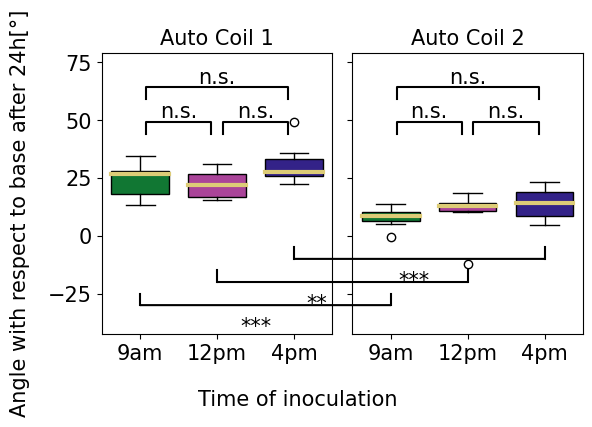

In [128]:
eps = 5

fig, ax = plt.subplots(1,2, figsize=(6,4), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel()    

for k in range(len(ax)):
    ax[k].set_title('Auto Coil {}'.format(k+1), fontsize=fs)
    foo = [angles[Times[i]][:,k] for i in range(len(Times))]
    bplot = ax[k].boxplot(foo, widths=0.75, patch_artist=True, 
                      medianprops={'lw':3, 'color':colors[5]})
    for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
        patch.set_facecolor(color)

    ax[k].set_xticks(range(1,4), Times)
    ax[k].tick_params(labelsize=fs)
    ax[k].set_ylim((hmin - eps*6, hmax+eps*6))


epsx = 0.075
for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    if i+j == 2:
        epsy = 3*eps
    else:
        epsy = 0
    xfoo = np.array([i+1+epsx, i+1+epsx, j+1-epsx, j+1-epsx])
    yfoo = np.array([hmax-eps,hmax,hmax,hmax-eps]) + epsy
    
    for k in range(len(ax)):    
        ax[k].text((xfoo[0] + xfoo[2])*.5, yfoo[0]+eps, smwhit[ix,k], ha='center', va='bottom', color='k', fontsize=fs)
        ax[k].plot(xfoo, yfoo, lw=1.5, c='k')

yvals = -2*eps*(np.arange(2, -1, -1) + 1)

for i in range(len(yvals)):
    xy = (i+1, yvals[i])
    con = connpatch(xyA=xy, xyB=xy, coordsA='data', coordsB='data',
                    axesA=ax[0], axesB=ax[1], color="k", lw=1.5)
    ax[1].add_artist(con)

for i in range(len(yvals)):
    for j in range(len(ax)):
        ax[j].plot([i+1, i+1], [yvals[i]+eps, yvals[i]], lw=1.5, c='k')

ax[0].text( 2.5, yvals[0]-eps, '***', ha='center', va='top', color='k', fontsize=fs)
ax[0].text( 3.3, yvals[1]-eps, '**', ha='center', va='top', color='k', fontsize=fs)
ax[1].text( 1.3, yvals[2]-eps, '***', ha='center', va='top', color='k', fontsize=fs)

fig.supxlabel('Time of inoculation', fontsize=fs)
fig.supylabel('Angle with respect to base after 24h[°]', fontsize=fs)
fig.tight_layout();

filename = dst + 'final_angle_repavg'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

In [129]:
for i in range(len(Times)):
    print(Times[i], '\tcoil 1 vs 2\t', stats.mannwhitneyu(angles[Times[i]][:,0], angles[Times[i]][:,1], method='exact'))

9am 	coil 1 vs 2	 MannwhitneyuResult(statistic=48.0, pvalue=0.0011655011655011655)
12pm 	coil 1 vs 2	 MannwhitneyuResult(statistic=33.0, pvalue=0.015151515151515152)
4pm 	coil 1 vs 2	 MannwhitneyuResult(statistic=48.0, pvalue=0.0011655011655011655)


In [130]:
mwhit = np.zeros((3,2))
for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    for k in range(2):
        mwhit[ix,k] = stats.mannwhitneyu(positions[Times[i]][:,k], positions[Times[j]][:,k], method='exact').pvalue
        print('Coil', k+1, '\t', Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:', mwhit[ix,k])
    print('---')
smwhit = singifmtx(mwhit, limits)
print(smwhit)

hmin = min([np.min(positions[Times[i]]) for i in range(len(Times))])
hmax = max([np.max(positions[Times[i]]) for i in range(len(Times))])+50
print(hmin, hmax)

Coil 1 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.8356643356643356
Coil 2 	 9am vs 12pm 	Mann-Whitney U-test p-val: 1.0
---
Coil 1 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.07284382284382285
Coil 2 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.25932400932400934
---
Coil 1 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.18065268065268064
Coil 2 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.23426573426573427
---
[['n.s.' 'n.s.']
 ['n.s.' 'n.s.']
 ['n.s.' 'n.s.']]
159.49530894079766 586.2676095498958


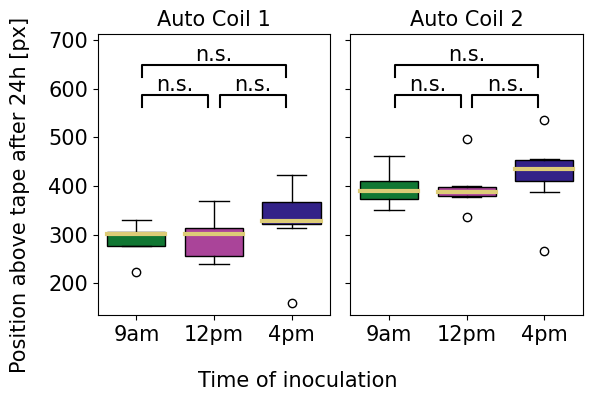

In [132]:
eps = 25

fig, ax = plt.subplots(1,2, figsize=(6,4), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel()    

for k in range(len(ax)):
    ax[k].set_title('Auto Coil {}'.format(k+1), fontsize=fs)
    foo = [positions[Times[i]][:,k] for i in range(len(Times))]
    bplot = ax[k].boxplot(foo, widths=0.75, patch_artist=True, 
                      medianprops={'lw':3, 'color':colors[5]})
    for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
        patch.set_facecolor(color)

    ax[k].set_xticks(range(1,4), Times)
    ax[k].tick_params(labelsize=fs)
    ax[k].set_ylim((hmin - eps, hmax+eps*5))


epsx = 0.075
for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    if i+j == 2:
        epsy = 2.5*eps
    else:
        epsy = 0
    xfoo = np.array([i+1+epsx, i+1+epsx, j+1-epsx, j+1-epsx])
    yfoo = np.array([hmax-eps,hmax,hmax,hmax-eps]) + epsy
    
    for k in range(len(ax)):    
        ax[k].text((xfoo[0] + xfoo[2])*.5, yfoo[0]+eps, smwhit[ix,k], ha='center', va='bottom', color='k', fontsize=fs)
        ax[k].plot(xfoo, yfoo, lw=1.5, c='k')

fig.supxlabel('Time of inoculation', fontsize=fs)
fig.supylabel('Position above tape after 24h [px]', fontsize=fs)
fig.tight_layout();

filename = dst + 'final_position_repavg'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

# Check the distance between the two coils

In [133]:
mwhit = np.zeros((1,3))

for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    mwhit[0,ix] = stats.mannwhitneyu(tight[Times[i]], tight[Times[j]], method='exact').pvalue
    print('Coil', k+1, '\t', Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:', mwhit[0,ix])

smwhit = singifmtx(mwhit, limits)
print(smwhit)

hmin = min([np.min(tight[key]) for key in speed])
hmax = max([np.max(tight[key]) for key in speed])
print(hmin, hmax)
hmax = 215

Coil 2 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.7307692307692307
Coil 2 	 9am vs 4pm 	Mann-Whitney U-test p-val: 1.0
Coil 2 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 1.0
[['n.s.' 'n.s.' 'n.s.']]
59.637302187258285 184.2741852444567


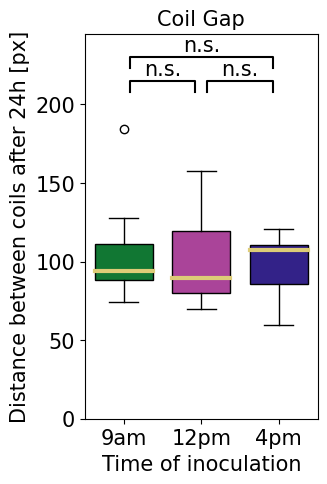

In [134]:
fig, ax = plt.subplots(1,1, figsize=(3,5), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel(); i=0

bplot = ax[i].boxplot([tight[key] for key in speed], 
                      widths=0.75, patch_artist=True, 
                      medianprops={'lw':3, 'color':colors[5], 'alpha':1}, zorder=3)
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)

for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    if i+j == 2:
        epsy = 15
    else:
        epsy = 0
    xfoo = np.array([i+1+epsx, i+1+epsx, j+1-epsx, j+1-epsx])
    yfoo = np.array([hmax-7,hmax,hmax,hmax-7]) + epsy
    ax[0].text((xfoo[0] + xfoo[2])*.5, yfoo[0]+8, smwhit[0,ix], ha='center', va='bottom', color='k', fontsize=fs)
    ax[0].plot(xfoo, yfoo, lw=1.5, c='k')

i = 0
ax[i].set_ylim((0,hmax+30))
ax[i].tick_params(labelsize=fs);
ax[i].set_xticks(np.arange(len(Times)) + 1, Times, fontsize=fs);
ax[i].set_ylabel('Distance between coils after 24h [px]', fontsize=fs);
ax[i].set_xlabel('Time of inoculation', fontsize=fs)
ax[i].set_title('Coil Gap', fontsize=fs);

filename = dst + 'coil_tightness_repavg'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

# Check at which timestamp the cuscuta stops varying its position

## Consider how fast the cuscuta gets to this terminal position

In [135]:
hmax = max([np.max(stables[Times[i]]) for i in range(len(Times))] + [np.max(manu[Times[i]][:,1]) for i in range(len(Times))])
hmin = min([np.min(stables[Times[i]]) for i in range(len(Times))] + [np.min(manu[Times[i]][:,1]) for i in range(len(Times))])
print(hmax, hmin)

mwhit = np.zeros((3,3))

for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    mwhit[ix, 0] = stats.mannwhitneyu(manu[Times[i]][:,1], manu[Times[j]][:, 1], method='exact').pvalue
    print('Manual\t',Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:',mwhit[ix,0])
    for k in range(2):
        mwhit[ix,k+1] = stats.mannwhitneyu(stables[Times[i]][:,k], stables[Times[j]][:, k], method='exact').pvalue
        print('Coil', k+1, '\t', Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:', mwhit[ix,k+1])
    print('---')

smwhit = singifmtx(mwhit, limits)
print(smwhit)

21.0 9.685333333333334
Manual	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.05303030303030303
Coil 1 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.4452214452214452
Coil 2 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.5337995337995338
---
Manual	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.01748251748251748
Coil 1 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.16491841491841494
Coil 2 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.01748251748251748
---
Manual	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.16491841491841494
Coil 1 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.6282051282051282
Coil 2 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.13752913752913754
---
[['n.s.' 'n.s.' 'n.s.']
 ['*' 'n.s.' '*']
 ['n.s.' 'n.s.' 'n.s.']]


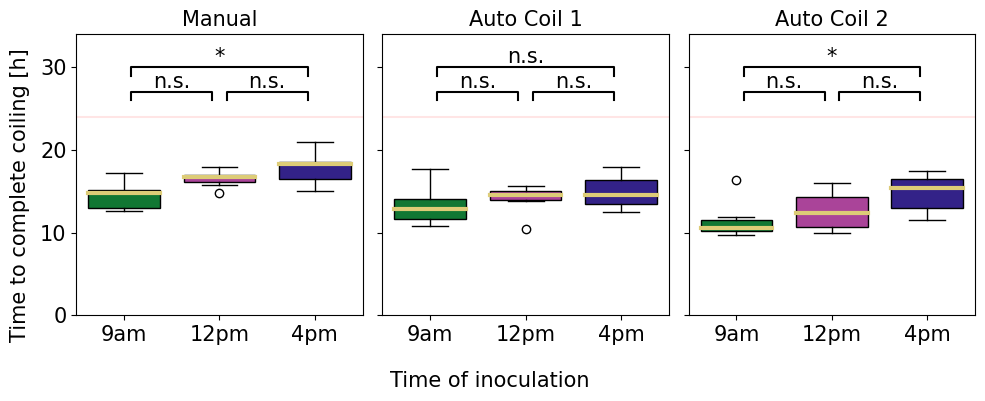

In [136]:
hmax = 27

fig, ax = plt.subplots(1,3, figsize=(10,4), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel()    

ax[0].set_title('Manual', fontsize=fs)
foo = [manu[Times[i]][:,1] for i in range(len(Times))]
bplot = ax[0].boxplot(foo, widths=0.75, patch_artist=True, 
                  medianprops={'lw':3, 'color':colors[5]})
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)


ax[1].set_title('Auto Coil 1', fontsize=fs)
foo = [stables[Times[i]][:,0] for i in range(len(Times))]
bplot = ax[1].boxplot(foo, widths=0.75, patch_artist=True, 
                  medianprops={'lw':3, 'color':colors[5]})
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)

ax[2].set_title('Auto Coil 2', fontsize=fs)
foo = [stables[Times[i]][:,1] for i in range(len(Times))]
bplot = ax[2].boxplot(foo, widths=0.75, patch_artist=True, 
                  medianprops={'lw':3, 'color':colors[5]})
for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
    patch.set_facecolor(color)

epsx = 0.075
for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    if i+j == 2:
        epsy = 3
    else:
        epsy = 0
    xfoo = np.array([i+1+epsx, i+1+epsx, j+1-epsx, j+1-epsx])
    yfoo = np.array([hmax-1,hmax,hmax,hmax-1]) + epsy
    
    for k in range(len(ax)):    
        ax[k].text((xfoo[0] + xfoo[2])*.5, yfoo[0]+1, smwhit[ix,k], ha='center', va='bottom', color='k', fontsize=fs)
        ax[k].plot(xfoo, yfoo, lw=1.5, c='k')

for i in range(len(ax)):
    #ax[i].margins(x = 0.05)
    ax[i].set_xticks(range(1,4), Times)
    ax[i].tick_params(labelsize=fs)
    ax[i].set_ylim((0,34))
    ax[i].axhline(24, c='red', alpha=0.1)

fig.supxlabel('Time of inoculation', fontsize=fs)
fig.supylabel('Time to complete coiling [h]', fontsize=fs)
fig.tight_layout();

filename = dst + 'time_to_complete_coiling_repavg'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')

In [137]:
hmax = max([np.max(quicks[Times[i]]) for i in range(len(Times))])
hmin = min([np.min(quicks[Times[i]]) for i in range(len(Times))])
print(hmax, hmin)

mwhit = np.zeros((3,2))

for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    for k in range(2):
        mwhit[ix,k] = stats.mannwhitneyu(quicks[Times[i]][:,k], quicks[Times[j]][:,k], method='exact').pvalue
        print('Coil', k+1, '\t', Times[i],'vs',Times[j],'\tMann-Whitney U-test p-val:', mwhit[ix,k])
    print('---')
smwhit = singifmtx(mwhit, limits)
print(smwhit)

12.206686857058243 1.7897071817303871
Coil 1 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.6282051282051282
Coil 2 	 9am vs 12pm 	Mann-Whitney U-test p-val: 0.9452214452214451
---
Coil 1 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.3828671328671329
Coil 2 	 9am vs 4pm 	Mann-Whitney U-test p-val: 0.8047785547785549
---
Coil 1 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.07342657342657342
Coil 2 	 12pm vs 4pm 	Mann-Whitney U-test p-val: 0.9452214452214451
---
[['n.s.' 'n.s.']
 ['n.s.' 'n.s.']
 ['n.s.' 'n.s.']]


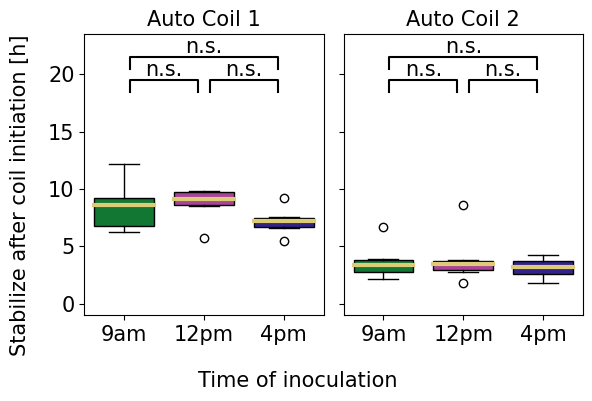

In [138]:
hmax = 19.5
eps = 1

fig, ax = plt.subplots(1,2, figsize=(6,4), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel()    

for k in range(len(ax)):
    ax[k].set_title('Auto Coil {}'.format(k+1), fontsize=fs)
    foo = [quicks[Times[i]][:,k] for i in range(len(Times))]
    bplot = ax[k].boxplot(foo, widths=0.75, patch_artist=True, 
                      medianprops={'lw':3, 'color':colors[5]})
    for patch, color in zip(bplot['boxes'], colors[:len(Times)]):
        patch.set_facecolor(color)

    ax[k].set_xticks(range(1,4), Times)
    ax[k].tick_params(labelsize=fs)
    ax[k].set_ylim((-1, hmax+4))


epsx = 0.075
for ix,(i,j) in enumerate(it.combinations(range(len(Times)), 2)):
    if i+j == 2:
        epsy = 2
    else:
        epsy = 0
    xfoo = np.array([i+1+epsx, i+1+epsx, j+1-epsx, j+1-epsx])
    yfoo = np.array([hmax-eps,hmax,hmax,hmax-eps]) + epsy
    
    for k in range(len(ax)):    
        ax[k].text((xfoo[0] + xfoo[2])*.5, yfoo[0]+eps, smwhit[ix,k], ha='center', va='bottom', color='k', fontsize=fs)
        ax[k].plot(xfoo, yfoo, lw=1.5, c='k')

fig.supxlabel('Time of inoculation', fontsize=fs)
fig.supylabel('Stabilize after coil initiation [h]', fontsize=fs)
fig.tight_layout();

filename = dst + 'time_btwn_initiation_and_completion_repavg'
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')
plt.savefig(filename + '.jpg', format='jpg', dpi=200, pil_kwargs={'optimize':True}, bbox_inches='tight')